# Introduction to Prompt Engineering

*Prompt* เป็นการป้อนคำสั่งให้กับ large language model (LLM) เช่น GPT, Gemini, หรือ Llama เพื่อให้ได้มาซึ่งผลลัพธ์ที่ต้องการ ซึ่งต่อมาได้มีการพัฒนาเทคนิคต่างๆ ในการเขียน prompt ที่ทำให้ผลลัพธ์ที่ได้มีคุณภาพมากขึ้น ซึ่งเราเรียกเทคนิคเหล่านั้นว่า *prompt engineering*

ใน Notebook นี้เราจะยกตัวอย่างการเขียน prompt และ เปรียบเทียบผลลัพธ์ที่ได้จาก Prompt และ โมเดลที่แตกต่างกัน
โดยใช้ *LlamaIndex* ซึ่งเป็น เป็นเฟรมเวิร์กข้อมูลที่เรียบง่ายและยืดหยุ่นสำหรับเชื่อมต่อแหล่งข้อมูลที่กำหนดเองกับ LLM ที่เราต้องการ 

In [1]:
# Reference: https://platform.openai.com/docs/guides/vision
import io
import os
import base64
from PIL import Image
from openai import OpenAI
from IPython.display import display

os.environ["OPENAI_API_KEY"] = "..." # ใส่ OpenAI API key ที่นี้
client = OpenAI(api_key=os.environ["OPENAI_API_KEY"])

In [2]:
def get_completion(prompt: str, model: str = "gpt-4o"):
    response = client.chat.completions.create(
        model=model,
        messages=[{"role": "user", "content": prompt}]
    )
    return response.choices[0].message.content.strip()

get_completion("Why is sky blue?")

"The sky appears blue primarily due to a phenomenon called Rayleigh scattering. This scattering occurs when sunlight passes through Earth's atmosphere and interacts with the molecules and small particles in the air. Here’s a more detailed explanation:\n\n1. **Sunlight Composition**: Sunlight, or white light, is composed of many different colors, each with its own wavelength. The visible spectrum ranges from longer wavelengths (red, orange) to shorter wavelengths (blue, violet).\n\n2. **Interaction with Atmosphere**: As sunlight enters Earth’s atmosphere, it collides with gas molecules such as nitrogen and oxygen. These molecules are much smaller than the wavelength of visible light.\n\n3. **Scattering of Light**: Due to the small size of these molecules relative to the wavelength of light, shorter wavelengths (blue and violet) are scattered in all directions much more effectively than longer wavelengths (red and yellow). This is known as Rayleigh scattering.\n\n4. **Perception of Blue*

In [3]:
response = get_completion("What is the meaning of life?")
print(response)

The question of the meaning of life is one of the oldest and most profound philosophical dilemmas. Different cultures, religions, philosophical traditions, and individuals have offered a wide range of answers to this question. Here are some perspectives:

1. **Religious Views**:
   - **Christianity**: Life's purpose is to know, love, and serve God and to prepare for eternal life with Him.
   - **Islam**: The purpose of life is to worship Allah and live according to His guidance as presented in the Quran.
   - **Buddhism**: Life is a journey of suffering and enlightenment, with the ultimate goal being to attain Nirvana, a state of liberation from the cycle of rebirth.
   - **Hinduism**: Life’s purpose is to achieve Dharma (duty/ethical life), Artha (prosperity), Kama (desires/passions), and Moksha (liberation from the cycle of reincarnation).
   
2. **Philosophical Views**:
   - **Existentialism**: Life has no inherent meaning; individuals must create their own meaning through their cho

## **Prompt Engineering**

Prompt ที่ดีควรจะมีส่วนประกอบดังนี้
- Instruction : งานหรือคำสั่งที่ต้องการให้โมเดลทำ
- Context : ข้อมูลภายนอกหรือบริบทเพิ่มเติมที่ช่วยให้โมเดลตอบได้ดีขึ้น
- Input ข้อมูลหรือคำถามที่เราสนใจหาคำตอบ
- Output Indicator : ประเภทหรือรูปแบบของผลลัพธ์ที่ต้องการ เช่น Tone, Length, Style

ref: https://www.promptingguide.ai/introduction/elements

In [4]:
# prompt ปกติ
response = get_completion("Could you list down 5 stunning campaings ideas for my new product launch?")
print(response)

Of course! Here are five stunning campaign ideas to help you launch your new product successfully:

### 1. **Interactive Virtual Launch Event:**
**Concept:** Host an immersive virtual launch event that allows attendees to explore the product in a simulated environment.
**Execution:**
- Use VR/AR technology to create a virtual showroom where users can interact with the product.
- Include live Q&A sessions with the product development team and influencers.
- Gamify the experience with interactive challenges and rewards.
**Platform:** Zoom, AltspaceVR, or Spatial

### 2. **User-Generated Content Contest:**
**Concept:** Engage your audience by encouraging them to create content around your product.
**Execution:**
- Launch a contest asking users to share creative photos, videos, or stories featuring the product.
- Promote a unique hashtag for the campaign.
- Offer exciting prizes for the best submissions.
**Platform:** Instagram, TikTok, and Facebook

### 3. **Influencer Collaboration and U

In [5]:
# prompt แบบมีหลักการ
campaign_prompt = """
In next year, we are going to launch a new food product which is a healthy snack bar.
Could you list down 5 stunning campaings ideas for my new product launch?
The campaign ideas should be in the following format:
# Campaign Name 1 
## Campaign Name
- Campaign Objective
- Campaign Target Audience
- Indicators of Success

# Campaign Name 2
and so on...

The audience for the campaign are Thai Gen Z so the campaign headline should contain some trendy words and in Thai language.
"""
campaign_lists = get_completion(campaign_prompt)
print(campaign_lists)

# เคลียร์พลังบาร์นะ
## Clear Energy Bar Na!
- **Campaign Objective**: Create buzz and generate interest by highlighting the energy-boosting benefits of the healthy snack bar.
- **Campaign Target Audience**: Thai Gen Z who are students, young professionals, and fitness enthusiasts.
- **Indicators of Success**: Social media engagement (likes, shares, comments, hashtag usage), increased website traffic, and pre-order metrics.

# ฟิต & ฟินอินเทรนด์
## Fit & Fin In-Trend
- **Campaign Objective**: Emphasize how the snack bar fits perfectly into a trendy, health-conscious lifestyle.
- **Campaign Target Audience**: Health-conscious Thai Gen Z individuals who follow fitness trends and healthy eating.
- **Indicators of Success**: User-generated content featuring the product, fitness influencers' endorsements, and growth in social media following.

# อิ่มอินสไตล์
## Im-In-Style
- **Campaign Objective**: Showcase the stylish, modern packaging and the convenience of the bar.
- **Campaign Target Aud

# Few-shot Prompting

เป็นการยกตัวอย่างเพียงเล็กน้อยเพื่อให้โมเดลสามารถตอบคำถามได้ตรงตามความต้องการ\
ref: https://www.promptingguide.ai/techniques/fewshot

In [6]:
# ทดสอบแบบไม่มี few-shot 
baseline = """
Could you list down 5 catchphrases of Thai convenience store 7-Eleven
The catchphrases should be catchy and trendy and must be in Thai language.
"""
baseline_resp = get_completion(baseline)
print(baseline_resp)

Sure! Here are five catchy and trendy Thai catchphrases for 7-Eleven convenience stores:

1. **สะดวกทุกเวลา เซเว่นใกล้บ้านคุณ** 
   ("Convenience anytime, 7-Eleven near your home")

2. **ทุกวัน ทุกเวลา เซเว่น** 
   ("Every day, every time, 7-Eleven")

3. **ยิ้มรับความสะดวก เซเว่น** 
   ("Smile with convenience, 7-Eleven")

4. **ซื้อครบ จบที่เซเว่น**
   ("Complete your shopping at 7-Eleven")

5. **ไม่ว่าจะวันไหน เซเว่นอยู่เสมอ**
   ("No matter the day, 7-Eleven is always here")

These phrases resonate with the convenience, accessibility, and reliable presence that 7-Eleven stores are known for in Thailand.


In [7]:
few_shot_prompt = """
Could you list down 5 catchphrases of Thai convenience store 7-Eleven
The catchphrases should be catchy and trendy and must be in Thai language.
here are some examples:
- ไข่สด CP : ไข่สดซีพี เติมสิ่งดีๆ ให้กับชีวิต
- CP : สด สะอาด ปลอดภัย มั่นใจทุกวัน
- CP Fresh Mart : ทุกมื้อดีๆ ที่ซีพีเฟรชมาร์ท
"""
few_shot_resp = get_completion(few_shot_prompt)
print(few_shot_resp)

Sure, here are five catchy and trendy catchphrases for Thai convenience store 7-Eleven:

1. เซเว่น อีเลฟเว่น: คำว่า “สะดวก” คือเราทุกวัน
2. เซเว่น อีเลฟเว่น: ของกินของใช้ครบ จบในที่เดียว
3. เซเว่น อีเลฟเว่น: มีเธอทุกเวลา ทุกวัน ทุกคืน
4. เซเว่น อีเลฟเว่น: แค่ก้าวเข้ามา ความสุขรออยู่
5. เซเว่น อีเลฟเว่น: แวะได้ทุกเมื่อ รอเสิร์ฟบริการทุกเวลา

I hope these capture the essence you're looking for!


#### Chain-of-Thought (CoT) Prompting

เป็นการบอกให้โมเดลใช้เหตุผลในการวิเคราะห์คำถาม หรือ คำสั่งก่อนที่จะตอบคำถาม CoT เป็นเทคนิคที่นิยมในการทำให้โมเดลสามารถแก้ปัญหาที่ซับซ้อนได้ดีขึ้น โดยแยกได้ 2 ประเภท คือ
- *Chain-of-Thought (CoT) Prompting* ที่จะเป็นการใส่ลำดับความคิดเข้าไปใน prompt
- *Zero-shot Chain-of-Thought (CoT) Prompting* เป็นการสั่งให้โมเดลคิดอย่างเป็นลำดับเพื่อให้ได้ผลลัพธ์ที่ต้องการ

In [8]:
the_hardest_problem_for_llm = "อยากให้เมื่อวานเป็นวันพรุ่งนี้จัง วันนี้จะได้เป็นวันศุกร์ วันนี้เป็นวันอะไร?"
baseline_resp = get_completion(the_hardest_problem_for_llm)
# คำตอบที่ถูกต้องคือ วันพุธ หรือ วันอาทิตย์
print(baseline_resp)

ถ้าวันนี้คุณต้องการให้เป็นวันศุกร์ และเมื่อวานเป็นวันพุธ (เพื่อที่วันพรุ่งนี้จะเป็นวันพฤหัสบดี) แสดงว่าวันนี้ต้องเป็นวันพฤหัสบดี 

ดังนั้น วันนี้เป็นวันพฤหัสบดีค่ะ!


In [9]:
cot = """
อยากให้เมื่อวานเป็นวันพรุ่งนี้จัง วันนี้จะได้เป็นวันศุกร์ วันนี้เป็นวันอะไร

Let's think step by step:
พรุ่งนี้ ในโลกจริง คือ เมื่อวาน ในโลกสมมติ
เราอยากให้ วันนี้ในโลกสมมติ จะเป็นวันศุกร์ ดังนั้นเมื่อวานในโลกสมมติเป็นวันพฤหัสบดี
ดังนั้น วันนี้ในโลกจริง คือ วันอะไร?
"""
cot_resp = get_completion(cot)
print(cot_resp)

ในโลกสมมติ คุณอยากให้วันนี้เป็นวันศุกร์ ดังนั้นเมื่อวานในโลกสมมติเป็นวันพฤหัสบดี

เมื่อพิจารณาว่า "พรุ่งนี้ในโลกจริง" ต้องเทียบเท่ากับ "เมื่อวานในโลกสมมติ":
- ดังนั้น เมื่อวานในโลกสมมติ (วันพฤหัสบดี) = พรุ่งนี้ในโลกจริง

ถ้าพรุ่งนี้ในโลกจริงเป็นวันพฤหัสบดี แสดงว่า:
- วันนี้ในโลกจริงต้องเป็นวันพุธ

ดังนั้น วันนี้ในโลกจริงคือวันพุธ


In [10]:
cot_zero_shot = """
อยากให้เมื่อวานเป็นวันพรุ่งนี้จัง วันนี้จะได้เป็นวันศุกร์ วันนี้เป็นวันอะไร
Let's think step by step.
"""
cot_zero_shot_resp = get_completion(cot_zero_shot)
print(cot_zero_shot_resp)

ถ้าเมื่อวานเป็นวันพรุ่งนี้ วันนี้จะได้เป็นวันศุกร์ เรามาลองคิดกันทีละขั้นตอนนะ

1. สมมติว่า เมื่อวานเป็นวันพรุ่งนี้
2. นั่นหมายความว่า วันนี้ต้องเป็นวันหนึ่งวันถัดจากวันที่เป็นวันเมื่อวาน
3. ดังนั้น ถ้าวันนี้เป็นวันศุกร์ วันถัดจากวันศุกร์ คือวันเสาร์ 

ถ้าเมื่อวานเป็นวันเสาร์ (เพราะเมื่อวานคือวันหนึ่งวันก่อนวันที่เป็นวันศุกร์)

สรุป ถ้าเมื่อวานเป็นวันเสาร์ วันนี้ต้องเป็นวันอาทิตย์

แต่ในคำถามบอกว่า วันนี้จะได้เป็นวันศุกร์ หมายความว่าวันนี้เป็นวันอะไรอยู่แล้ว?

ถ้าวันนี้เป็นวันศุกร์:
- วันพฤหัสบดีเป็นวันก่อนหน้า

ตามเงื่อนไขที่ว่า "เมื่อวานเป็นวันพรุ่งนี้" จะควรหมายความว่า:

วันนี้ต้องเป็นวันศุกร์ และเมื่อวานเป็นวันพฤหัสบดี

แต่นี่ขัดแย้งกับสมมติฐานเรื่อง "เมื่อวานเป็นวันพรุ่งนี้"

ดังนั้นมันเป็นไปไม่ได้ที่เงื่อนไขนี้จะเป็นไปตามสมมติฐานในคำถามจริงๆ

เพื่อไม่ให้สับสน เราได้บรรลุผลสรุปว่าน่าจะมีความขัดแย้งแต่อย่างน้อย เวลาเริ่มนับนั่น วันนี้คือ "พฤหัสบดี"


## **Multimodal with ChatGPT**

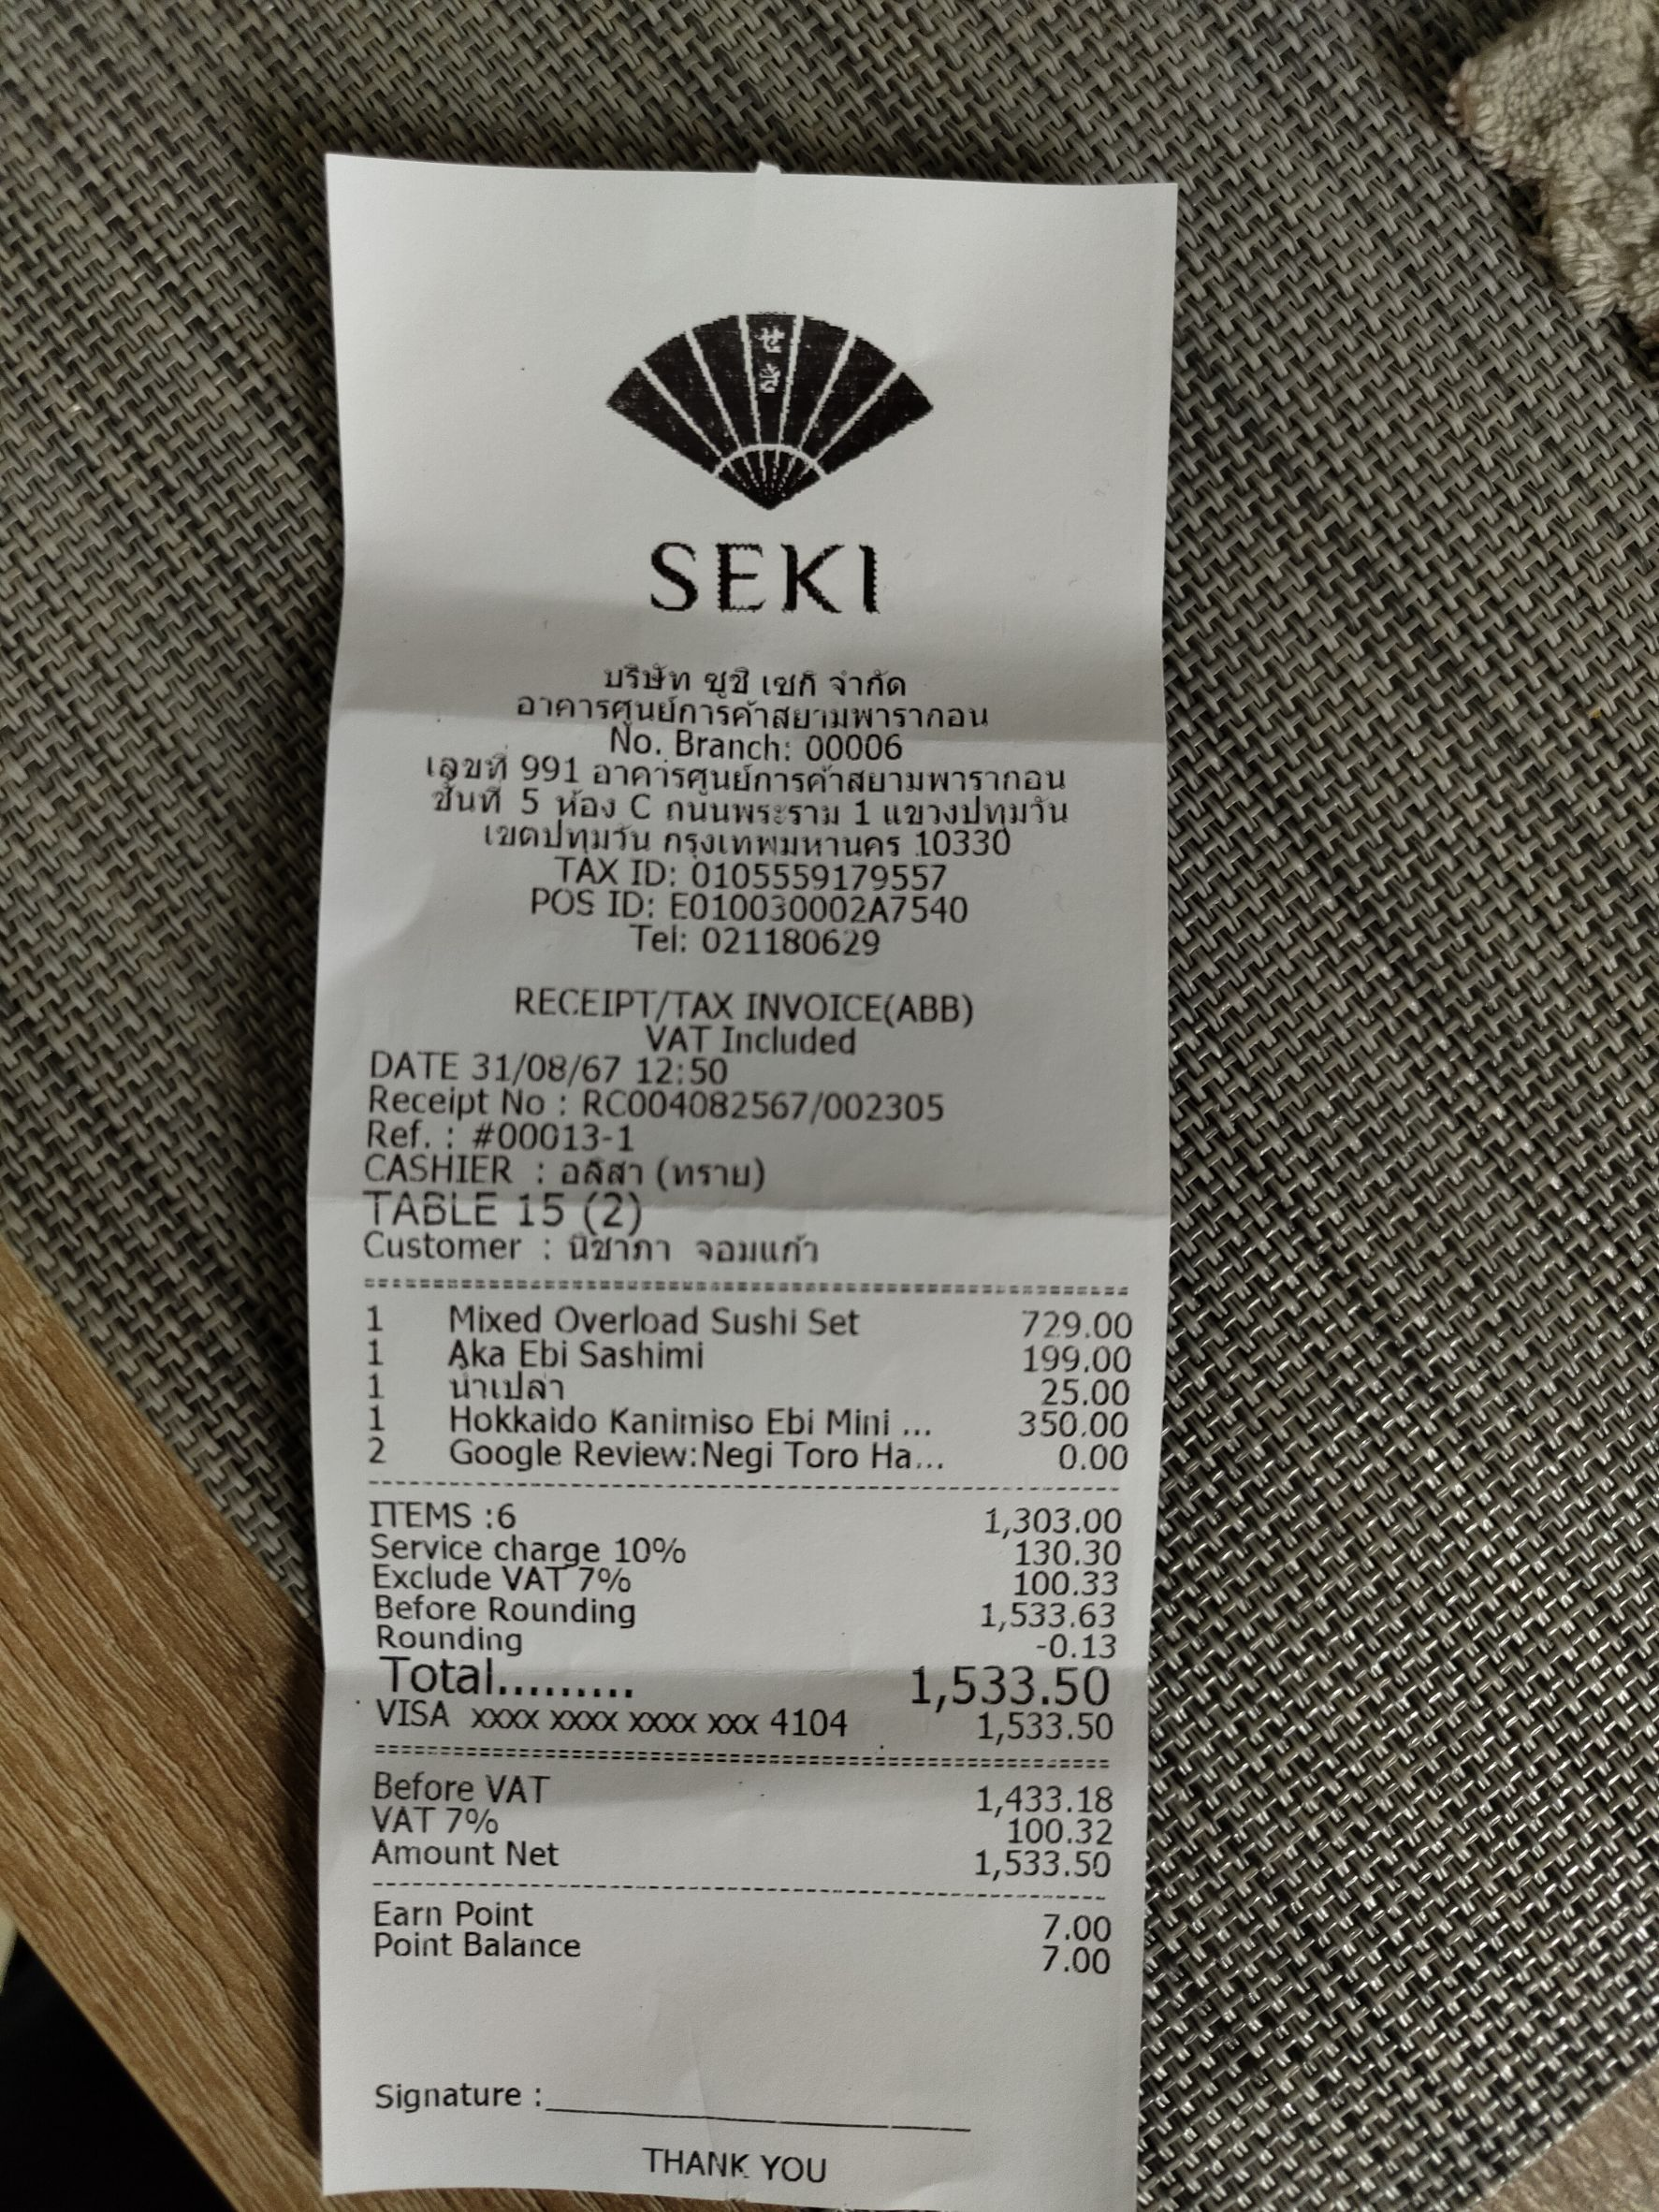

In [11]:
# Load the image from a path
image_path = '../assets/seki_example.jpg'
image = Image.open(image_path)
display(image)

In [12]:
system_prompt = """\
You are a helpful assistant designed to extract information from the input document and user question.\
Please always answer the question based on the information extracted from the document and in a concise manner.
"""

In [13]:
def encode_image(image: Image.Image) -> str:
    """Encode an image into base64 format."""
    buffered = io.BytesIO()
    image.save(buffered, format="JPEG")
    return base64.b64encode(buffered.getvalue()).decode("utf-8")

def create_link(base64_image: str) -> str:
    """Create a link from a base64 image."""
    return f"data:image/jpeg;base64,{base64_image}"

def extract_information(image_path: str, prompt: str) -> str:
    """Extract information from the image and return the answer."""
    # Load the image
    image = Image.open(image_path)
    # Encode the image
    encoded_image = encode_image(image)
    image_link = create_link(encoded_image)

    response = client.chat.completions.create(
        model="gpt-4o",
        messages=[
            {"role": "system", "content": system_prompt},
            {
                "role": "user",
                "content": [
                    {
                        "type": "text",
                        "text": prompt,
                    },
                    {
                        "type": "image_url",
                        "image_url": {
                            "url": image_link,
                        }
                    }
                ]
            }
        ],
        response_format={ "type": "json_object" } # response in JSON format!
    )

    answer = response.choices[0].message.content
    return answer

In [14]:
question = """
Perform optical character information and export in the following JSON format.

{
  tax_id: str,
  pos_id: str,
  tel_number: str,
  date: str,
  recepit_number: str,
  items: list[name, float],
  price_before_vat: float,
  total_price: float,
  vat_7_percent: float,
  earn_point: float
}
"""
image_path = '../assets/seki_example.jpg'
answer = extract_information(image_path, question)
print("Answer:", answer)

Answer: {
  "tax_id": "0105559179557",
  "pos_id": "E0100530002A7540",
  "tel_number": "021180629",
  "date": "31/08/67",
  "recepit_number": "#00013-1",
  "items": [
    ["Mixed Overload Sushi Set", 799.00],
    ["Aka Ebi Sashimi", 199.00],
    ["Hokkaido Kanimiso Ebi Mini", 350.00],
    ["Google Review: Negi Toro Ha", 25.00]
  ],
  "price_before_vat": 1433.18,
  "total_price": 1533.50,
  "vat_7_percent": 100.32,
  "earn_point": 7.00
}


## **Explain Nong Moo Deng**

ลองใส่ภาพน้องหมูเด้งแล้วทดลองใช้ ChatGPT อธิบายว่าทำไมน้องถึงเป็น Viral ในโลกออนไลน์

In [15]:
system_prompt = """\
You are a helpful assistant designed to interpret the image and see why the given image gets viral online. You should provide an answer in Thai.
"""
query = "Give an image, please explain why the given image of 'หมูเด้ง', a baby hippo, is viral online?"

In [16]:
def generate_output(image_path: str, prompt: str) -> str:
    """Extract information from the image and return the answer."""
    # Load the image
    image = Image.open(image_path)
    # Encode the image
    encoded_image = encode_image(image)
    image_link = create_link(encoded_image)

    response = client.chat.completions.create(
        model="gpt-4o",
        messages=[
            {"role": "system", "content": system_prompt},
            {
                "role": "user",
                "content": [
                    {
                        "type": "text",
                        "text": prompt,
                    },
                    {
                        "type": "image_url",
                        "image_url": {
                            "url": image_link,
                        }
                    }
                ]
            }
        ],
    )

    answer = response.choices[0].message.content
    return answer

In [17]:
image_path = "../assets/moodeng.jpg"
output = generate_output(image_path, query)
print(output)

ภาพของ "หมูเด้ง" ซึ่งเป็นลูกฮิปโปน้อยนี้กลายเป็นไวรัลออนไลน์เพราะความน่ารักน่าเอ็นดูของมันในสังคมออนไลน์ คนมักจะติดใจกับลูกสัตว์จิ๋วที่ดูน่ารักและมีลักษณะเฉพาะตัวที่น่าชื่นชม เช่นเดียวกับลูกฮิปโปน้อยนี้ที่ดูสดใสและน่ารัก นอกจากนี้ ท่าทางของลูกหมูเด้งที่กำลังอ้าปากคล้ายกำลังพูดคุยหรือร้องขออะไรบางอย่างยิ่งทำให้ภาพนี้ดูน่ารักและน่าขบขันมากยิ่งขึ้น

ปัจจัยเหล่านี้ได้ช่วยส่งเสริมความสนใจและทำให้ภาพนี้ถูกแชร์ออกไปในวงกว้าง จนกลายเป็นไวรัลในที่สุด
